In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:

#Import the data
df=pd.read_csv("insurance.csv")

In [4]:
#explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A linear regression will be used to model the target prediction value(charges) based on the other independent variables.

In [7]:
#visualize age distribution
age=df.age
age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [8]:
pd.Series({'count age':age.count(),
          'minimum age':age.min(),
          'maximum age':age.max()
    })

count age      1338
minimum age      18
maximum age      64
dtype: int64

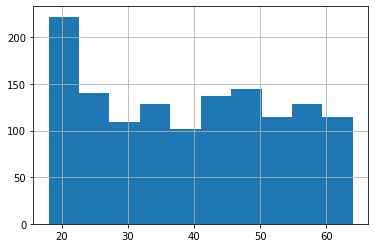

In [9]:
age.hist();

The distribution of the age variable on the histogram represents a discrete uniform distribution.

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
#isolate all continuous and discrete columns
numerical_continuous=df.select_dtypes("float")
numerical_continuous

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [12]:
numerical_discrete=df.select_dtypes("integer")
numerical_discrete

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


In [13]:
#identifyimg outliers in the numerical continuous columns
numcount=pd.DataFrame(numerical_continuous,columns=['charges'])
numcount.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


<function matplotlib.pyplot.show(close=None, block=None)>

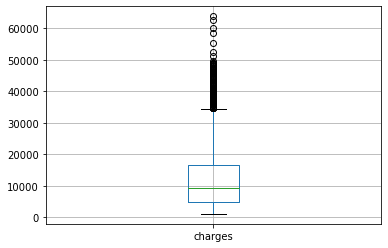

In [14]:
numcount.boxplot(column='charges')
plt.show

In [15]:
numctbmi=pd.DataFrame(numerical_continuous,columns=['bmi'])
numctbmi.head()

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880


<function matplotlib.pyplot.show(close=None, block=None)>

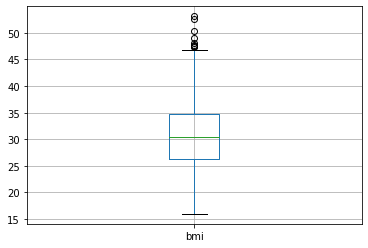

In [16]:
numctbmi.boxplot(column='bmi')
plt.show

In [17]:
#resolve using a zscore
from scipy import stats
zscore=np.abs(stats.zscore(numcount))
zscore

array([[0.2985838 ],
       [0.95368917],
       [0.72867467],
       ...,
       [0.96159623],
       [0.93036151],
       [1.31105347]])

In [18]:
threshold=3
np.where(zscore>3)

(array([  34,  543,  577,  819, 1146, 1230, 1300], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [20]:
threshold=3
numcount_clean=numcount
numcount_clean=numcount_clean[(zscore<threshold).all(axis=1)]

In [21]:
numcount.shape

(1338, 1)

In [22]:
numcount_clean.shape

(1331, 1)

In [23]:
from scipy import stats
zscore=np.abs(stats.zscore(numctbmi))
zscore

array([[0.45332   ],
       [0.5096211 ],
       [0.38330685],
       ...,
       [1.0148781 ],
       [0.79781341],
       [0.26138796]])

In [24]:
threshold=3
np.where(zscore>3)

(array([ 116,  847, 1047, 1317], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [25]:
threshold=3
numctbmi_clean=numctbmi
numctbmi_clean=numctbmi_clean[(zscore<threshold).all(axis=1)]

In [26]:
numctbmi.shape

(1338, 1)

In [28]:
#isolating categorical columns
categorical=df.select_dtypes(object)
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


<AxesSubplot:xlabel='children'>

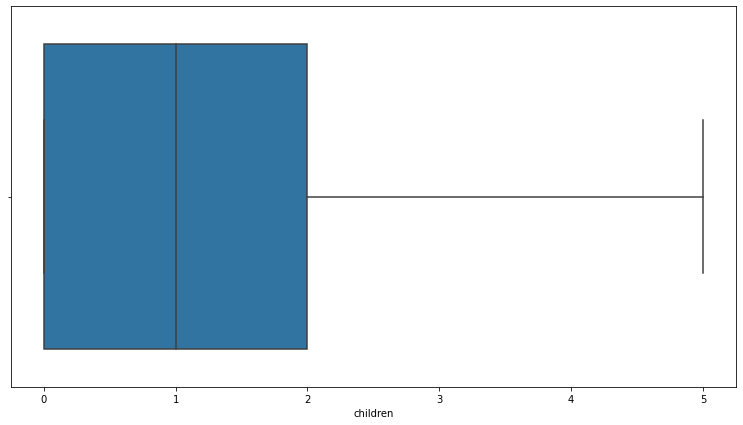

In [29]:
#Detect and remove outliers: Discrete: children

plt.figure(figsize=(13,7))
sns.boxplot(df.children)

<AxesSubplot:xlabel='age'>

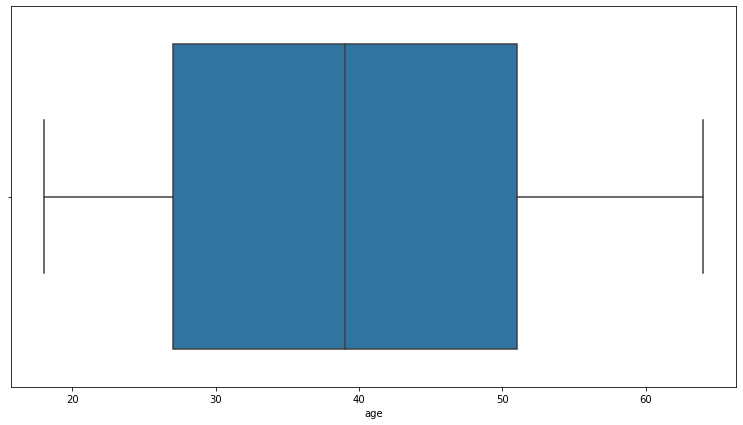

In [30]:
#Detect and remove outliers: Discrete: age

plt.figure(figsize=(13,7))
sns.boxplot(df.age)

<AxesSubplot:>

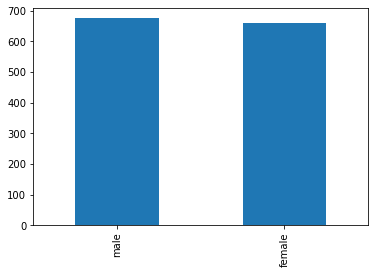

In [31]:
#categorical features
df['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

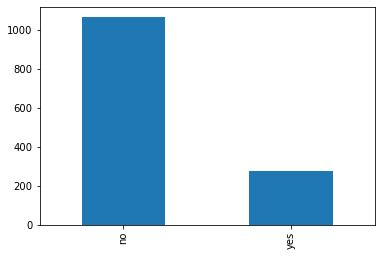

In [32]:
df['smoker'].value_counts().plot(kind='bar')

<AxesSubplot:>

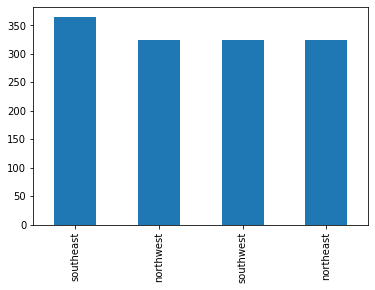

In [33]:

df['region'].value_counts().plot(kind='bar')

In [34]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
df.sex = le.fit_transform(df.sex)
#smoker
df.smoker = le.fit_transform(df.smoker)
#region
df.region = le.fit_transform(df.region)
#children
df.children = le.fit_transform(df.children)
#age
df.age = le.fit_transform(df.age)



df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [35]:

# Create X (all the feature columns)
X = df.drop("charges", axis=1)

# Create y (the target column)
Y = df["charges"]

In [37]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [38]:
#Check corellation to determine which variable affects charges the least
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [39]:
#Dropping unwanted columns in this case region from our features
X = X.drop(['region'], axis=1)
X.head()

,age,sex,bmi,children,smoker
0,1,0,27.900,0,1
1,0,1,33.770,1,0
2,10,1,33.000,3,0
3,15,1,22.705,0,0
4,14,1,28.880,0,0


The region column was dropped since it was the most insignificant.